In [1]:
### RANDOM DATA ANALSYSIS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in Basic_Stats.csv to df
df = pd.read_csv('./data/Basic_Stats.csv')

print(df.keys())

Index(['Age', 'Birth Place', 'Birthday', 'College', 'Current Status',
       'Current Team', 'Experience', 'Height (inches)', 'High School',
       'High School Location', 'Name', 'Number', 'Player Id', 'Position',
       'Weight (lbs)', 'Years Played'],
      dtype='object')


In [3]:
## Some basic data preprocessing to get data into more useable format

# Split "Birth Place" column into "City" and "State" columns
df[['BirthCity', 'BirthState']] = df['Birth Place'].str.split(' , ', expand=True)

# Drop "Birth Place" column
df.drop('Birth Place', axis=1, inplace=True)

# List of US States
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
            'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
            'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
            'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
            'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
            'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
            'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
states_abbrev = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
            'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
            'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
            'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
            'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

# For BirthState col, replace state name with state abbreviation
# This is because sometimes lists New York, sometimes NY, so make it consisten
df['BirthState'] = df['BirthState'].replace(states, states_abbrev)

BirthState
Estonia     80.000000
Ukraine     77.000000
Victoria    76.000000
B.C.        74.875000
NH          74.578947
              ...    
WV          72.934579
MA          72.891892
Sicily      72.000000
RI          72.000000
Croatia     70.000000
Name: Height (inches), Length: 63, dtype: float64


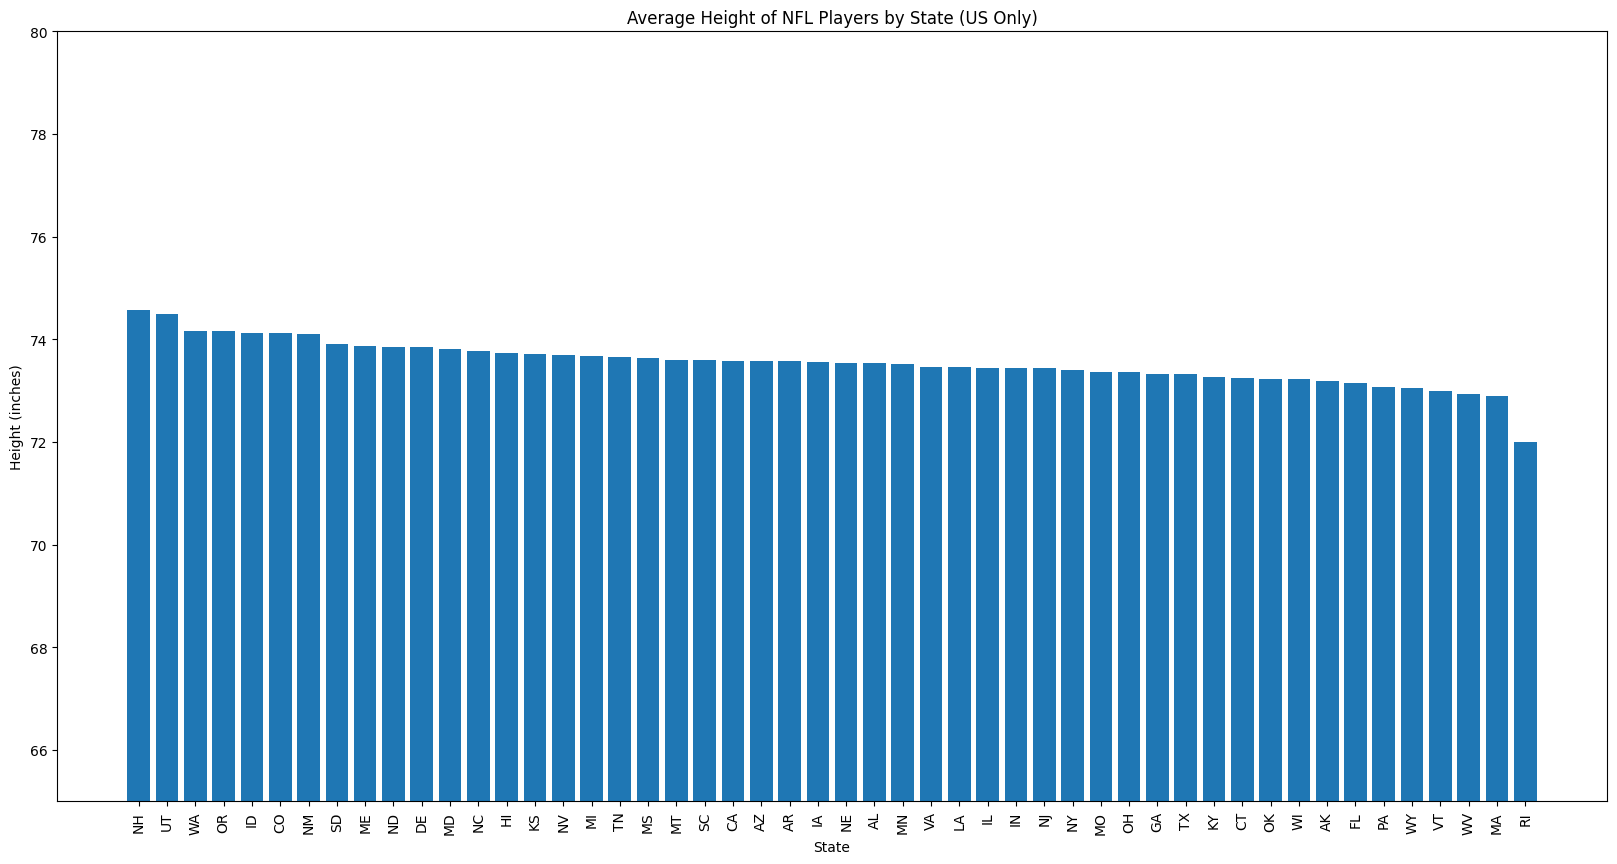

In [4]:
# Find average height of players by state, sort greatest to least
print(df.groupby('BirthState')['Height (inches)'].mean().sort_values(ascending=False))

# Graph average height of players by state
# Includes other countries
# df.groupby('BirthState')['Height (inches)'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(20,10), ylim=(60,85))

# Graph average height of players by state (US only)
height_by_state = df[df['BirthState'].isin(states_abbrev)].groupby('BirthState')['Height (inches)'].mean().sort_values(ascending=False)
plt.figure(figsize=(20,10))
plt.bar(height_by_state.index, height_by_state)
plt.ylim(65,80)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Height (inches)')
plt.title('Average Height of NFL Players by State (US Only)')
plt.show()

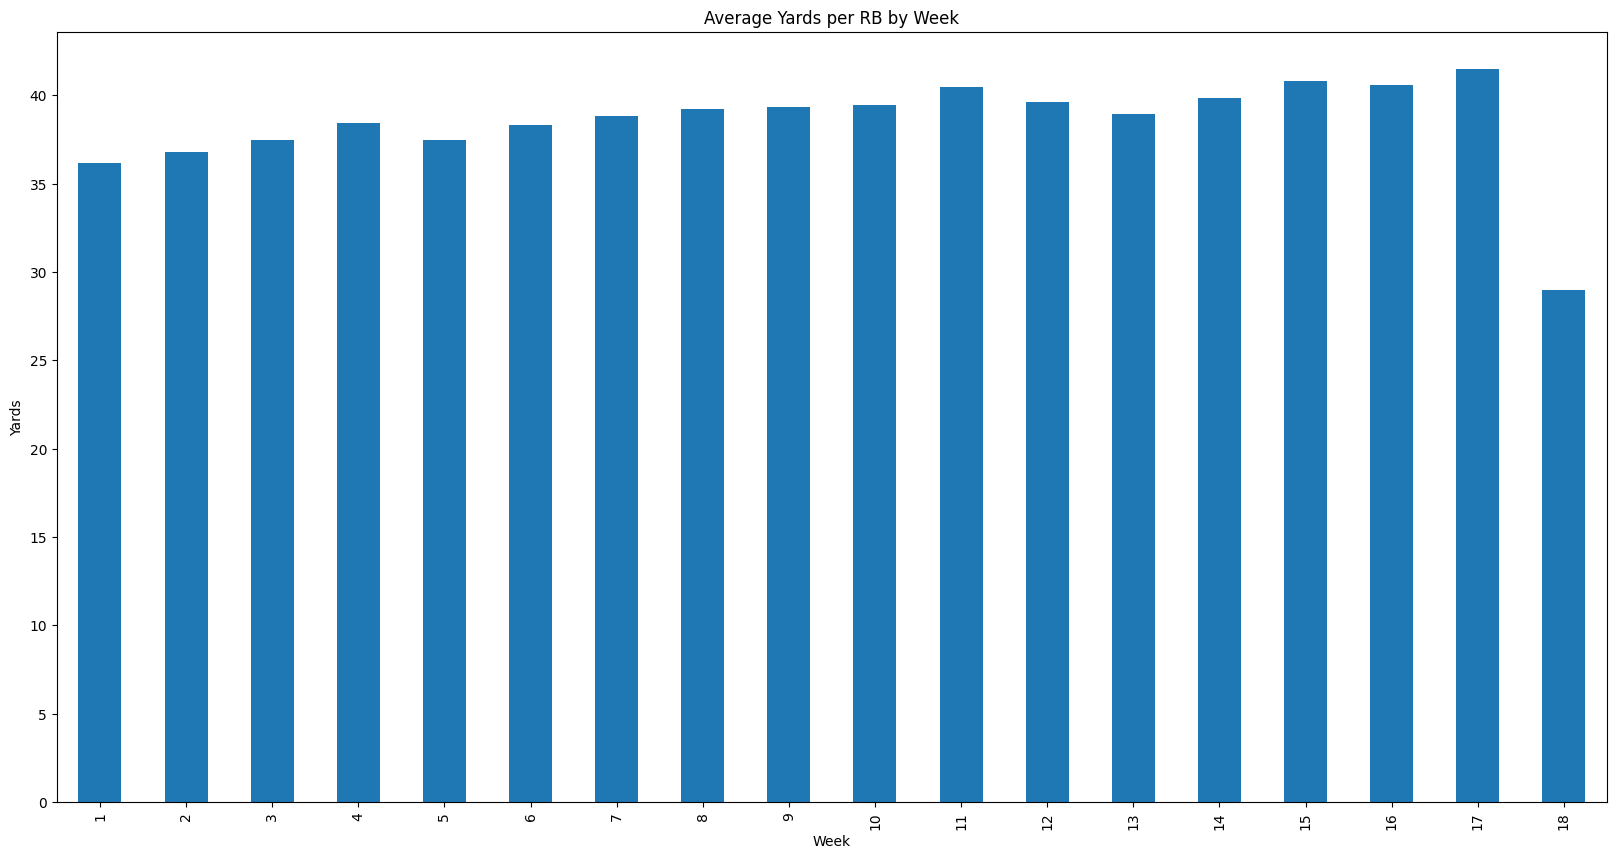

In [5]:
# Import runningback data
rb_df = pd.read_csv('./data/Game_Logs_Runningback.csv')

# Convert -- to 0
rb_df['Rushing Yards'] = rb_df['Rushing Yards'].replace('--', 0)
# Convert na to 0
rb_df['Rushing Yards'] = rb_df['Rushing Yards'].fillna(0)
# Convert rushing yards col to int
rb_df['Rushing Yards'] = rb_df['Rushing Yards'].astype(int)

# Ignore rows where season col not equal to "Regular Season"
rb_df = rb_df[rb_df['Season'] == 'Regular Season']
# Ignore rows where RB had 0 rushing yards
rb_df = rb_df[rb_df['Rushing Yards'] != 0]

# Plot average yards per game per week
rb_df.groupby('Week')['Rushing Yards'].mean().plot(kind='bar', figsize=(20,10))
plt.xlabel('Week')
plt.ylabel('Yards')
plt.title('Average Yards per RB by Week')
plt.show()


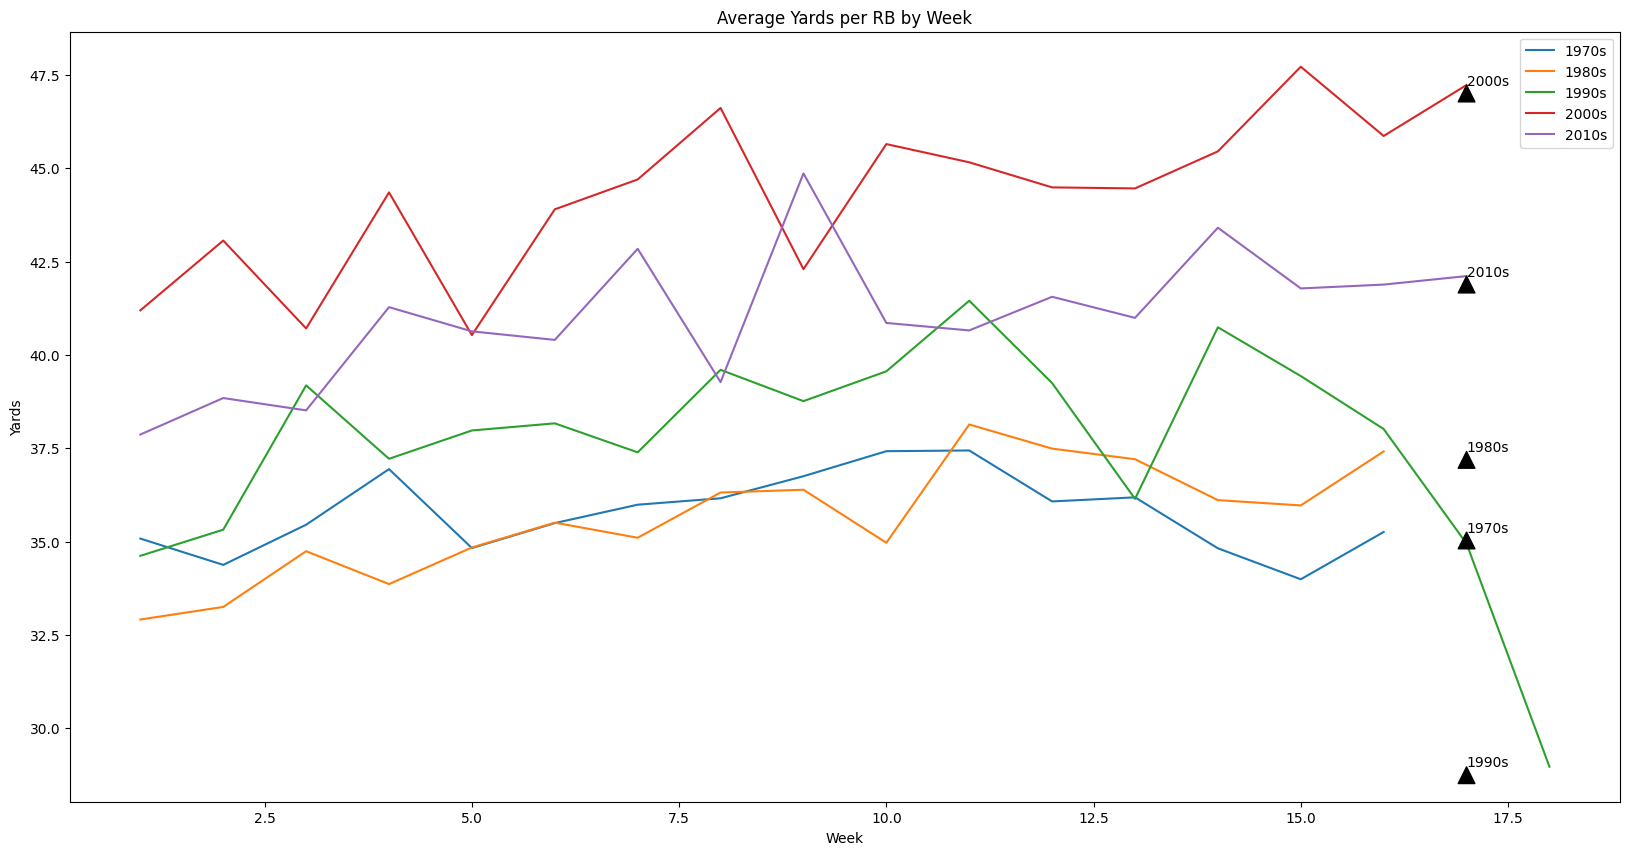

In [6]:
# Plot average yards per game per week for each decade on same plot
# 1970s
rb_df_70s = rb_df[(rb_df['Year'] >= 1970) & (rb_df['Year'] < 1980)]
rb_df_80s = rb_df[(rb_df['Year'] >= 1980) & (rb_df['Year'] < 1990)]
rb_df_90s = rb_df[(rb_df['Year'] >= 1990) & (rb_df['Year'] < 2000)]
rb_df_00s = rb_df[(rb_df['Year'] >= 2000) & (rb_df['Year'] < 2010)]
rb_df_10s = rb_df[(rb_df['Year'] >= 2010) & (rb_df['Year'] < 2020)]

dfs = [rb_df_70s, rb_df_80s, rb_df_90s, rb_df_00s, rb_df_10s]
dfs_data = []
for df in dfs:
    dfs_data.append(df.groupby('Week')['Rushing Yards'].mean())

plt.figure(figsize=(20,10))
for i in range(len(dfs_data)):
    plt.plot(dfs_data[i], label=f'{1970 + 10*i}s')
    # Put label to side of the line
    # plt.text(17, dfs_data[i], f'{1970 + 10*i}s', horizontalalignment='left', verticalalignment='center')
    # Annotate the line plot
    # plt.annotate(f'{1970 + 10*i}s', xy=(17, dfs_data[i]), xytext=(17, dfs_data[i]), arrowprops=dict(facecolor='black', shrink=0.05))
    plt.annotate(f'{1970 + 10*i}s', xy=(17, dfs_data[i].iloc[-1]), xytext=(17, dfs_data[i].iloc[-1]), arrowprops=dict(facecolor='black', shrink=0.05))
    
# Annotate the line plot
# plt.annotate('Strike', xy=(8, 100), xytext=(8, 100), arrowprops=dict(facecolor='black', shrink=0.05))
# Put labels to sides of the lines
# plt.text(8, 100, 'Strike', horizontalalignment='left', verticalalignment='center')
plt.xlabel('Week')
plt.ylabel('Yards')
plt.title('Average Yards per RB by Week')
plt.legend()
plt.show()